# Universidad Politecnica Salesiana
### Nombvre: Jessica Ñauta
### Asigntaura: Simulación
### Tema: Examen

### Objetivo:

* Consolidar los conocimientos adquiridos en clase para desarrollar simulaciones de eventos.

### Introducción:

El golpe económico de la crisis sanitaria del corona virus no va a ser cosa de semanas, sino de meses. Dentro de una de las etapas importantes que están a la vuelta de la esquina son las elecciones presidenciales y asambleístas del Ecuador. Para ello se plantea realizar un sistema de regresión que permita identificar cual es la tendencia de los votos en base al manejo de las redes sociales (Twitter y/o Facebook) [1].

Las regresiones lineales pueden aprenden por sí mismos y en este caso obtener automáticamente esa “recta” que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor “Y” de salida real [3].

### Enunciado:

* Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
    ◦	Obtener datos de tendencia de twitter o facebook, para ello se puede obtener a través del API [4].
        * Title: Titulo del Post/Twitter
        * Word count: la cantidad de palabras del artículo,
        * # of Links: los enlaces externos que contiene,
        * # of comments: cantidad de comentarios,
        * # Shares: compartidos.
        * HashTag
        * Etc.

En base a ello, se pretende proponer y generar una predicción de cuántas veces será compartido un post/twitter  utilizando regresión [2].

* Posteriormente se debe seguir un procesos de votación de eventos discretos que se describe a continuación:
    ◦	Tomar los resultados de la regresión para la selección del candidato.
    ◦	Se tiene una tendencia del 90% de personas que realizan el proceso de elección dentro del Ecuador.
    ◦	Dentro del procesos se tiene que alrededor del 5% - 10% votan nulo.
    ◦	Solo se va a tener en cuanta las elecciones de los asambleístas por el Azuay.
    ◦	Las personas solo tiene un recinto electoral para realizar el proceso.
    ◦	Las personas solo pueden realizar un proceso de elección por asambleísta del Azuay.
    ◦	La persona se acerca a la mesa electoral y hacen fila en caso de ser necesario.
    ◦	Realiza el voto en un tiempo aleatorio de un partido especifico.
    ◦	La persona recibe su certificado votación.
    ◦	La persona sale del recinto electoral.
    ◦	Finalmente generar una grafica de las personas que votaron y los asambleístas electos.
* El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
    ◦	Se debe establecer un modelo basado en modelos matemáticos y probabilísticos para la predicción del numero de veces que se compartirá o la tendencia electoral basada en redes sociales.
    ◦	El programa deberá generar gráficas que indiquen la ecuación matemática y probabilística de tendencias de votaciones.
    ◦	Deben calcularse las siguientes métricas del sistema de simulación de eventos discretos :
        ▪	Total de de personas que realizaron el proceso de votación.
        ▪	Asambleístas ganadores.
        ▪	El tiempo promedio de espera.

* Fecha se presentación: 20/12/2020 – 23:55.
* El informe en pdf (Archivo Notebook)  se deberá subir al Git personal, todo el sistema debe ser basado en Python - Open Source.
* Cualquier adición o librerías que no se revisaron en clases serán tomada como puntos adicionales al interciclo.


### Referencias:

[1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291769/

[2] https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/

[3] https://eprints.ucm.es/48804/1/TFM%20Manuel%20Alejandro%20Rodriguez%20Santana.pdf

[4] http://opac.pucv.cl/pucv_txt/txt-8000/UCC8094_01.pdf


In [21]:
#Se importa sleep, datetime, TextBlob y matplotlib
from time import sleep
from datetime import datetime
from textblob import TextBlob 
import matplotlib.pyplot as plt 
%matplotlib inline
#Importamos Librerias
import pandas as pd
import numpy as np
import tweepy as tw
from IPython.display import display
import seaborn as sns
from tweepy import OAuthHandler
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model

In [22]:
#Se define las variables para el acceso al API de twitter
consumer_key = 'BHPZBCYER9Sh2OLLqIQ3WdP60'
consumer_secret = 'J2K85qTPePRkprvzb4iJjwDoOri3y0oO8uNyl8LpKG9QaBTakP'
access_token = '1340037877992927235-tSNcBk1Dftm7TWmdPSVCTX9sHcFYrn'
access_token_secret = 'cIEgdauIsL6Dg60J3xLY6YHr7jbcTYdSPmfpeYkLxEZJp'

In [23]:
#Se autentica en twitter
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret) 
    
#se verifica que el usuario conectado en twitter es de uno
api = tw.API(auth)
print(api.me().name)

Jessica


In [24]:
buscarTweet = "Azuay"
ts = api.search(buscarTweet, count=50, result_type='popular') 

In [25]:

df = pd.DataFrame({'ID': list(map(lambda x: x.id , ts)),
                   'Usuario': list(map(lambda x: x.author.name , ts)),
                   'Fecha': list(map(lambda x: x.created_at, ts)),
                   'Texto': list(map(lambda x: x.text, ts)),
                   'RT': list(map(lambda x: x.retweet_count, ts)),
                   'Likes': list(map(lambda x: x.favorite_count, ts)),
                   'Followers': list(map(lambda x: x.author.followers_count, ts)),
                   '#Palabras': list(map(lambda x: len(x.text), ts)),
                   'Idioma': list(map(lambda x: x.lang, ts)),
                   'HashTag':list(map(lambda x: x[0]['text'] if x != [] else '', list(map(lambda x: x.entities['hashtags'], ts))))})
df['Fecha'] =pd.to_datetime(df.Fecha)
df.sort_values(by='Followers') 
df

,ID,Usuario,Fecha,Texto,RT,Likes,Followers,#Palabras,Idioma,HashTag
0,1340653190832861185,El Universo,2020-12-20 13:40:03,"Nancy Monroy, la maestra del niño que le pidió...",55,335,2214648,139,es,
1,1340655832221048832,cnegobec,2020-12-20 13:50:33,"VIDEO 🎥 | En #Azuay, delegados de las 15 organ...",25,14,244733,127,es,Azuay
2,1340703863402360841,El Universo,2020-12-20 17:01:24,La historia detrás del audio viral del niño de...,29,184,2214648,140,es,
3,1340843959761985536,Movimiento Alianza PAIS,2020-12-21 02:18:06,#RecorreLa35 Estuvimos en #Azuay y #Cañar el f...,16,18,309641,140,es,RecorreLa35
4,1340416056775589893,Movimiento Alianza PAIS,2020-12-19 21:57:46,Tus necesidades y preocupaciones son important...,24,26,309641,139,es,SomosLa35
5,1340796953962176512,Policía Ecuador,2020-12-20 23:11:19,TRAS LAS REJAS EL MÁS BUSCADO ||\n\nM. Arcelio...,14,41,1111961,140,es,MásBuscado
6,1339265209182150656,Andrés Arauz,2020-12-16 17:44:42,Gracias Prefecta @MendezAzuay por su apoyo a u...,755,1860,55936,140,es,
7,1339781200005763073,Andrés Arauz,2020-12-18 03:55:04,"Les damos nuestro respaldo y solidaridad, al i...",392,1241,55936,140,es,
8,1340061671277137920,Movimiento Alianza PAIS,2020-12-18 22:29:34,Solidaridad y esperanza de un mejor mañana. De...,25,29,309641,139,es,
9,1339286760149413892,cnegobec,2020-12-16 19:10:21,"#CNEInforma | En #Azuay, delegados de las 15 o...",80,43,244733,131,es,CNEInforma


<AxesSubplot:xlabel='Followers'>

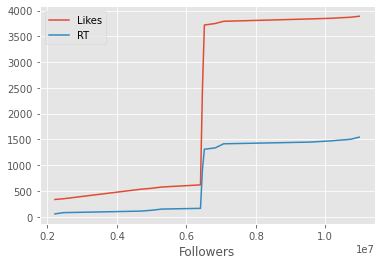

In [26]:
df1 = df.iloc[:, 2:7].cumsum()
df1.plot(x='Followers', y=['Likes','RT'])

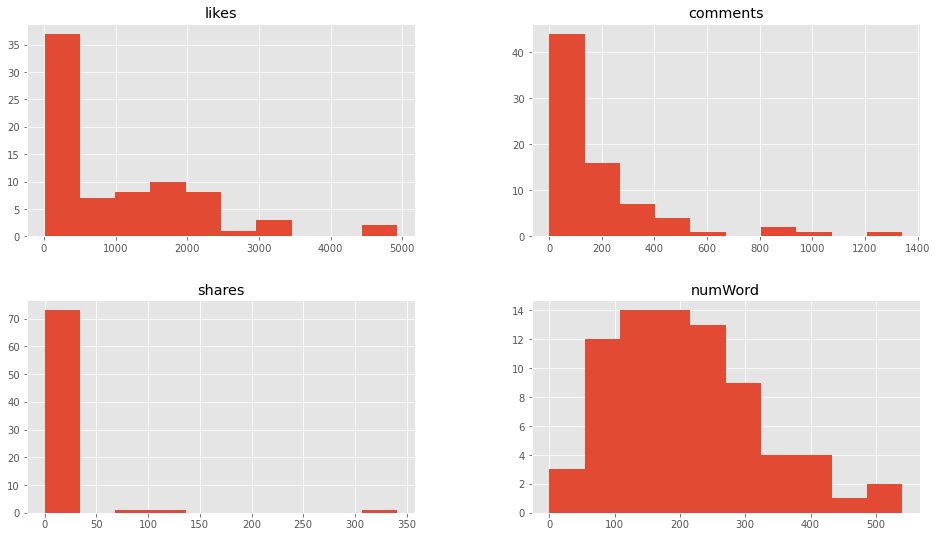

In [20]:
fb_posts.drop(['likes','comments', 'shares', 'numWord'],1).hist()
plt.show()

## Regresion Lineal

In [27]:
df1["sum"] = df1[['Likes','Followers']].sum(axis=1)
df2 = df1.loc[:, ['RT','Likes','sum']]
df2

,RT,Likes,sum
0,55,335,2214983
1,80,349,2459730
2,109,533,4674562
3,125,551,4984221
4,149,577,5293888
5,163,618,6405890
6,918,2478,6463686
7,1310,3719,6520863
8,1335,3748,6830533
9,1415,3791,7075309


Ecuación de la recta: [  55.   352.8  650.6  948.4 1246.2 1544. ] Z= 2.5041791883266673 * 57120 + 216.63692397874956
Prediccion:  143255.35216119798


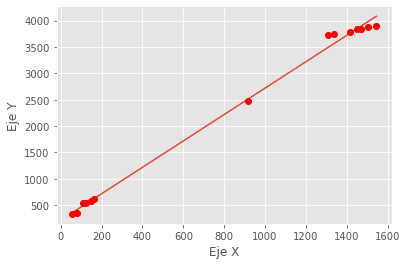

In [28]:
import matplotlib.pyplot as plt
import numpy as np

x = list(df2.iloc [:, 0]) # likes
y = list(df2.iloc [:, 1]) # Total

def promedio(x,y): 
    return sum(x) / len(y)

def operacion1(x,y):
    #obtiene x menos el promedio de x
    a = x-np.average(x)
    b = y-np.average(y)
    promxy = sum(a*b)
    promxx = sum(a*a)
    result =promxy/promxx
    return result

def operacion0(x,y):
    res = np.average(y)-operacion1(x,y)*np.average(x)
    return res

z = api.get_user('yakuperezg').followers_count

def graficar(x,y,z):
    b1 =operacion1(x,y)
    b0 =operacion0(x,y)
    predecir= b1*z+b0
    puntos_x = np.linspace(x[0],x[-1],6)
    puntos_y = b0+b1*puntos_x
    print("Ecuación de la recta:",puntos_x, 'Z=',b1,'*',z,'+',b0)
    print('Prediccion: ',predecir)
    plt.plot(puntos_x,puntos_y,)
    plt.plot(x,y,"o", color='red') 
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    
    plt.show()
    
    
if __name__=="__main__":
    graficar(x,y,z)

## Regresion Polinomial

Predicción:  57120


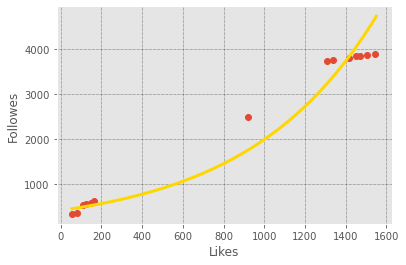

In [29]:
from scipy.optimize import curve_fit

x = list(df2.iloc [:, 0]) # likes
y = list(df2.iloc [:, 1]) # Total
z = api.get_user('yakuperezg').followers_count

curve_fit=np.polyfit(x,np.log(y),deg=1)
# print(curve_fit)

pred_x=np.array(list(range(min(x),max(x)+7)))
yx=np.exp(curve_fit[1])*np.exp(curve_fit[0]*pred_x)
plt.plot(x,y,"o")
plt.plot(pred_x,yx,color='gold',linewidth=3.0)

print('Predicción: ', str(z))

#Propiedades
plt.xlabel('Likes')
plt.ylabel('Followes')
plt.grid(color='black', linestyle='dotted', linewidth=0.5)

## Eventos discretos

In [33]:
import random 
import pylab as py
import simpy
import numpy as np
import pandas as pd


def votacion():
    i = 0
    persona = []
    llegada =  []
    espera = []
    votando = []
    papeletas =[]
    salida = []
    mesa = 350
    lista_total=[['Persona: ','Llega a las: ','Tiempo de espera','Proceso de votación','Voto finalizado']]
    while(i<mesa):
        if(i==0):
            persona.append(i)
            llegada.append(i)
            espera.append(random.random())
            votando.append(random.random())
            papeletas.append(i)
            #print(type(espera[i]))
            tiempo_salida =llegada[i] + espera[i] + votando[i]
            salida.append(tiempo_salida)
        if(i>=1):
            persona.append(i)
            llegada.append(llegada[i-1]+random.random())
            espera.append(max(salida[i-1],llegada[i])-llegada[i])
            votando.append(random.random())
            papeletas.append(max(salida[i-1],llegada[i])-salida[i-1])
            tiempo_salida =llegada[i] + espera[i] + votando[i]
            salida.append(tiempo_salida)
        i=i+1
    i=0
    
    while(i<mesa):
        lista=[str(persona[i]).format(2/3),str(llegada[i]).format(10/3).format(10/3),str(espera[i]).format(10/3),str(votando[i]).format(10/3),str(salida[i]).format(10/3)]
        lista_total.append(lista)
        i=i+1
    print(type(lista_total)) 
    data=pd.DataFrame(lista_total)
    print(data)
votacion()

<class 'list'>
             0                    1                    2                    3  \
0    Persona:         Llega a las:      Tiempo de espera  Proceso de votación   
1            0                    0    0.912387781219524   0.8864458343766876   
2            1  0.48435475952948515   1.3144788560667262  0.11316465798966746   
3            2    0.540855555230798    1.371142718355081  0.35949491611648476   
4            3   1.0636197678434312   1.2078734218589324   0.9247678876690604   
..         ...                  ...                  ...                  ...   
346        345   174.36646154313948                  0.0   0.5184156963228166   
347        346   174.63085677647265  0.25402046298964365   0.5009367989565703   
348        347   175.04526806337847    0.340545975040385  0.07713163652714683   
349        348      175.26378670836  0.19915896658602605   0.5395201751528174   
350        349   176.23792116890215                  0.0  0.36468876429211117   

            

In [31]:
import random
random.seed(1)
yaku_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
velasco_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
yaku_win_pct = 73.13
velasco_win_pct = 25.28
number_of_sims = 600
total_wards = 0
total_votos_velasco = 0
total_votos_yaku = 0
total_votes = 0
for i in range(number_of_sims):
    my_input = open('shares.txt')
    for line in my_input:
        total_wards += 1
        fields = line.strip().split()
        num_voters = int(fields[0])
        velasco_votes_in_ward = 0
        yaku_votes_in_ward = 0
        for j in range(num_voters):
            random_num = random.random() * 100
            if random_num <= yaku_win_pct:
                yaku_votes_in_ward += 1
                total_votos_yaku += 1
            elif random_num <= (yaku_win_pct + velasco_win_pct) :
                velasco_votes_in_ward += 1
                total_votos_velasco += 1
            total_votes += 1
        velasco_digit = int(str(velasco_votes_in_ward)[0])
        yaku_digit = int(str(yaku_votes_in_ward)[0])
        velasco_digits[velasco_digit] += 1
        yaku_digits[yaku_digit] += 1
    if i % 100 == 0:
        print('Simulacion con ', i)
velasco_win_pct = 100.0 * total_votos_velasco / total_votes
yaku_win_pct = 100.0 * total_votos_yaku / total_votes
print('Yaku Perez gana con:', yaku_win_pct , '%')
print('Juan Fernando Velasco pierde con:', velasco_win_pct, '%')

Simulacion con  0
Simulacion con  100
Simulacion con  200
Simulacion con  300
Simulacion con  400
Simulacion con  500
Yaku Perez gana con: 73.04405162738496 %
Juan Fernando Velasco pierde con: 25.356902356902356 %
